In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [120]:
train_data_file = "C:/Users/Stille/Desktop/ML projects/zhengqi_train.txt"
test_data_file =  "C:/Users/Stille/Desktop/ML projects/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep = '\t', encoding = 'utf-8')
test_data = pd.read_csv(test_data_file, sep = '\t', encoding = 'utf-8')

In [121]:
# get the summary of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

There are 2888 samples in the training set, 38 feature variables from V0 to V37. The dtypes of all feature variables are float64. None of them has null values.

In [122]:
# get the summary of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

There are 1925 samples in the test set.

In [123]:
# generate descriptive statistics
train_data.describe()

V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000   -12.891000  ...   
25%      -0.853000    -0.310000    -0.295000    -0.159000    -0.390000  ...   
50%      -0.466000     0.388000     0.344000     0.362000     0.042000  ...   
75%      -0.154000     0.831250     0.782250     0.726000     0.042000  ...   
max       0.489000     1.895000     1.918000     2.245000     1.335000  ...   

               V29          V30          V31          V32          V33  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.097648     0.055477     0.127791     0.020806     0.007801   
std       1.061200     0.901934     0.873028     0.902584     1.006995   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.283000    -0.170250    -0.407250    -0.499000   
50%      -0.023000     0.053500     0.299500     0.039000    -0.040000   
75%       0.745250     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.006715     0.197764     0.030658    -0.130330     0.126353  
std       1.003291     0.985675     0.970812     1.017196     0.983966  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.202500    -0.413000    -0.798250    -0.350250  
50%       0.160000     0.364000     0.137000    -0.185500     0.313000  
75%       0.273000     0.602000     0.644250     0.495250     0.793250  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

In [124]:
# generate descriptive statistics
test_data.describe()

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172   
std       1.073333     1.076670     0.969541     1.034925     1.147286   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000   
75%       0.549000     0.589000     0.278000     0.793000     0.610000   
max       2.100000     2.120000     1.946000     2.603000     4.475000   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.838049    -0.274092    -0.173971    -0.266709     0.255114  ...   
std       0.963043     1.054119     1.040101     1.085916     1.014394  ...   
min      -1.168000    -5.649000    -5.625000    -6.059000    -6.784000  ...   
25%       0.122000    -0.732000    -0.509000    -0.775000    -0.390000  ...   
50%       0.437000    -0.082000     0.018000    -0.004000     0.401000  ...   
75%       1.928000     0.457000     0.515000     0.482000     0.904000  ...   
max       3.176000     1.528000     1.394000     2.408000     1.766000  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.206871    -0.146463    -0.083215    -0.191729    -0.030782   
std       1.064140     0.880593     1.126414     1.138454     1.130228   
min      -2.435000    -2.413000    -4.507000    -7.698000    -4.057000   
25%      -0.453000    -0.818000    -0.339000    -0.476000    -0.472000   
50%      -0.445000    -0.199000     0.010000     0.100000     0.155000   
75%      -0.434000     0.468000     0.447000     0.471000     0.627000   
max       4.656000     3.022000     3.139000     1.428000     2.299000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

In [125]:
train_data.head(10)

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   
5  0.445  0.627  0.408  0.220  0.458 -1.056 -1.009 -1.896  0.481 -2.114  ...   
6  0.889  0.416  0.640  0.356  0.224 -0.893 -0.812 -1.823  0.729 -2.114  ...   
7  0.984  0.529  0.704  0.438  0.258 -0.917 -0.682 -1.721  0.753 -2.114  ...   
8  0.948  0.850  0.584  0.459  0.591 -0.523 -0.591 -1.524  0.763 -2.114  ...   
9  1.157  1.055  0.638  0.617  1.483 -0.731 -0.612 -1.524  0.968 -2.114  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  
5  0.454  0.674  0.358  0.618 -0.843 -0.290  0.364 -0.191 -0.883   0.060  
6  0.454  0.081  0.243  0.468 -0.843 -0.290  0.364 -0.155 -1.318   0.415  
7  0.139 -0.050  0.428 -0.119 -0.843 -0.290  0.364  0.100 -0.899   0.609  
8  0.188  0.467  0.597 -0.057 -0.843 -0.290  0.364  0.053 -0.553   0.981  
9  0.860  0.456  0.916  0.039 -0.843 -0.290  0.364  0.151 -1.157   0.818  

[10 rows x 39 columns]

In [126]:
test_data.head(10)

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   
5  0.050  0.340  0.108  0.051 -0.348  0.074  0.516  0.491  0.238  0.904  ...   
6 -0.223  0.175 -0.390  0.051  0.006  0.134  0.497  0.548 -0.099  0.904  ...   
7 -0.126  0.152  0.227  0.021 -0.619 -0.069  0.520  0.548  0.060  0.904  ...   
8 -0.203 -0.014  0.010 -0.034 -0.322  0.105  0.453  0.518 -0.032  0.473  ...   
9 -0.181  0.797  0.470 -0.107 -0.477  0.184  0.588  0.528  0.319  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  
5 -0.450 -0.897  0.536  0.447  0.370 -0.040 -0.290  0.008 -0.228  0.169  
6 -0.452 -0.937  0.249  0.432  0.494 -0.040 -0.290  0.008  0.104  1.077  
7 -0.452 -0.950  1.256  0.281  0.555 -0.040 -0.290  0.008 -0.700 -0.498  
8 -0.450 -0.950  0.078  0.222  0.245 -0.040 -0.290  0.008 -0.236 -0.149  
9 -0.446 -1.092 -0.131  0.466  0.430 -0.040 -0.290 -0.289 -0.431 -0.271  

[10 rows x 38 columns]

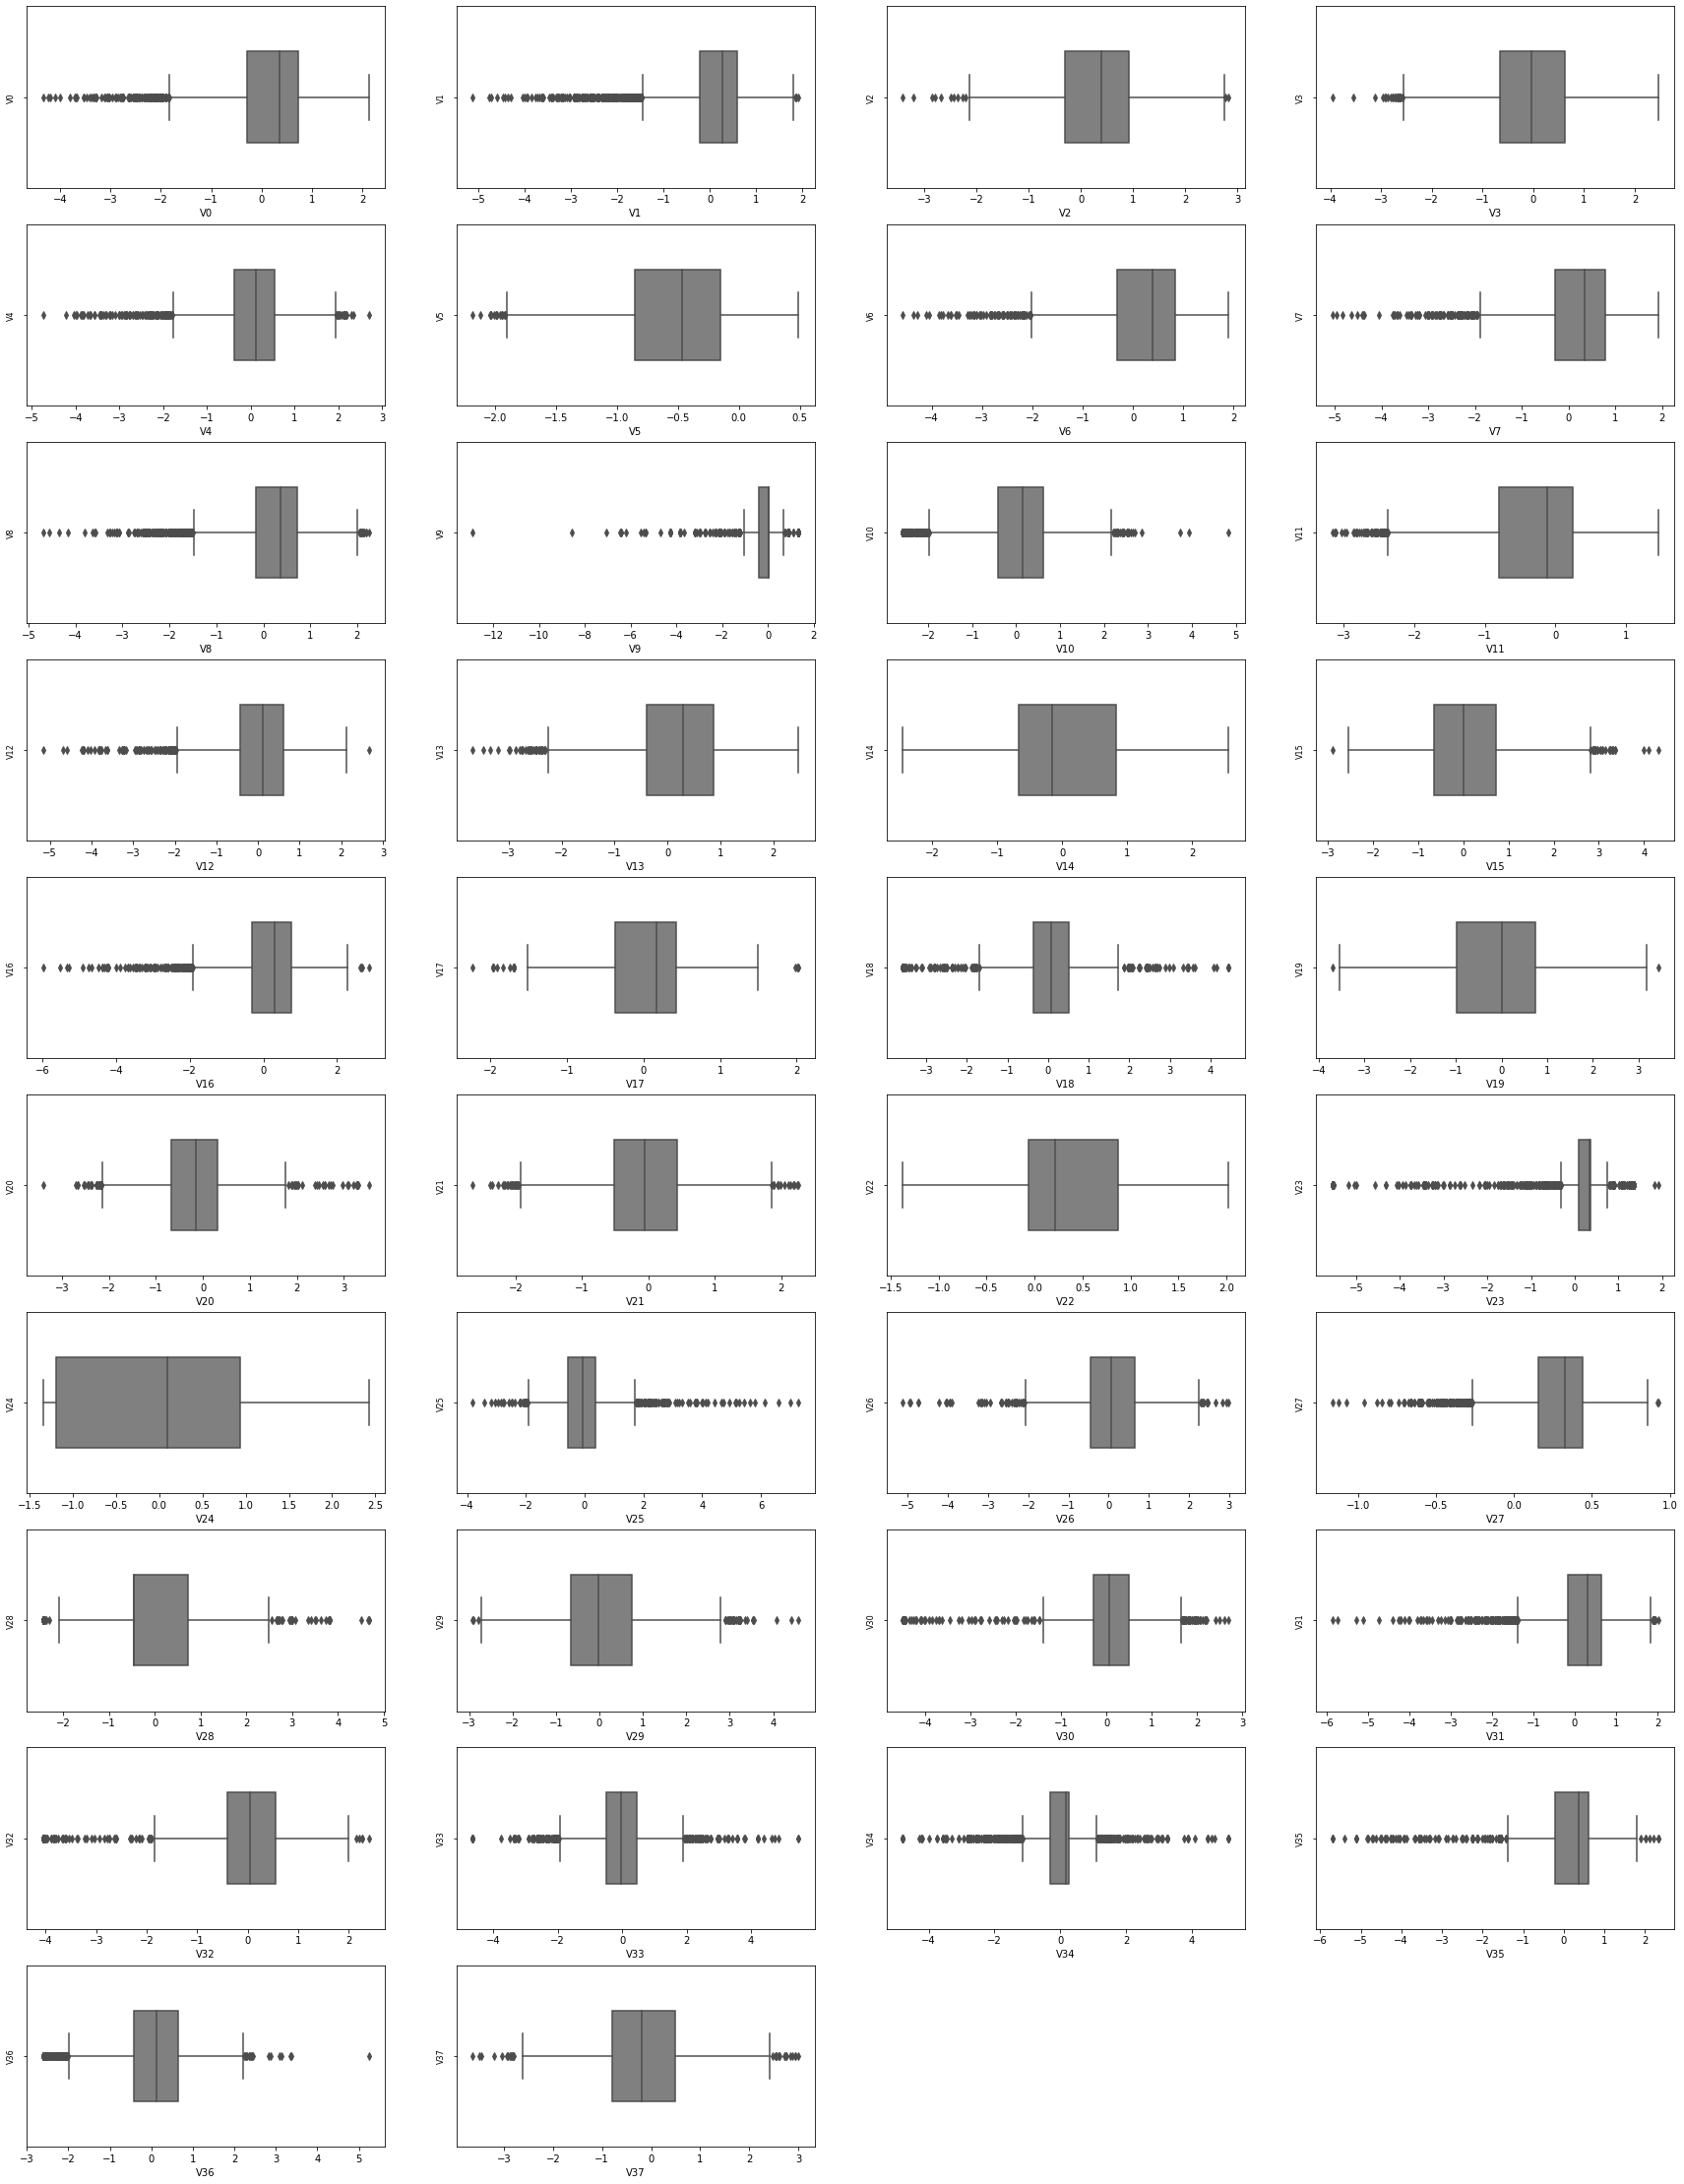

In [127]:
# Draw boxplot to explore the central tendency (median, mean and mode) of feature variables
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(30, 40))
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.boxplot(train_data[column[i]], color = "gray", width=0.5)
    plt.ylabel(column[i], fontsize=8)
plt.show()

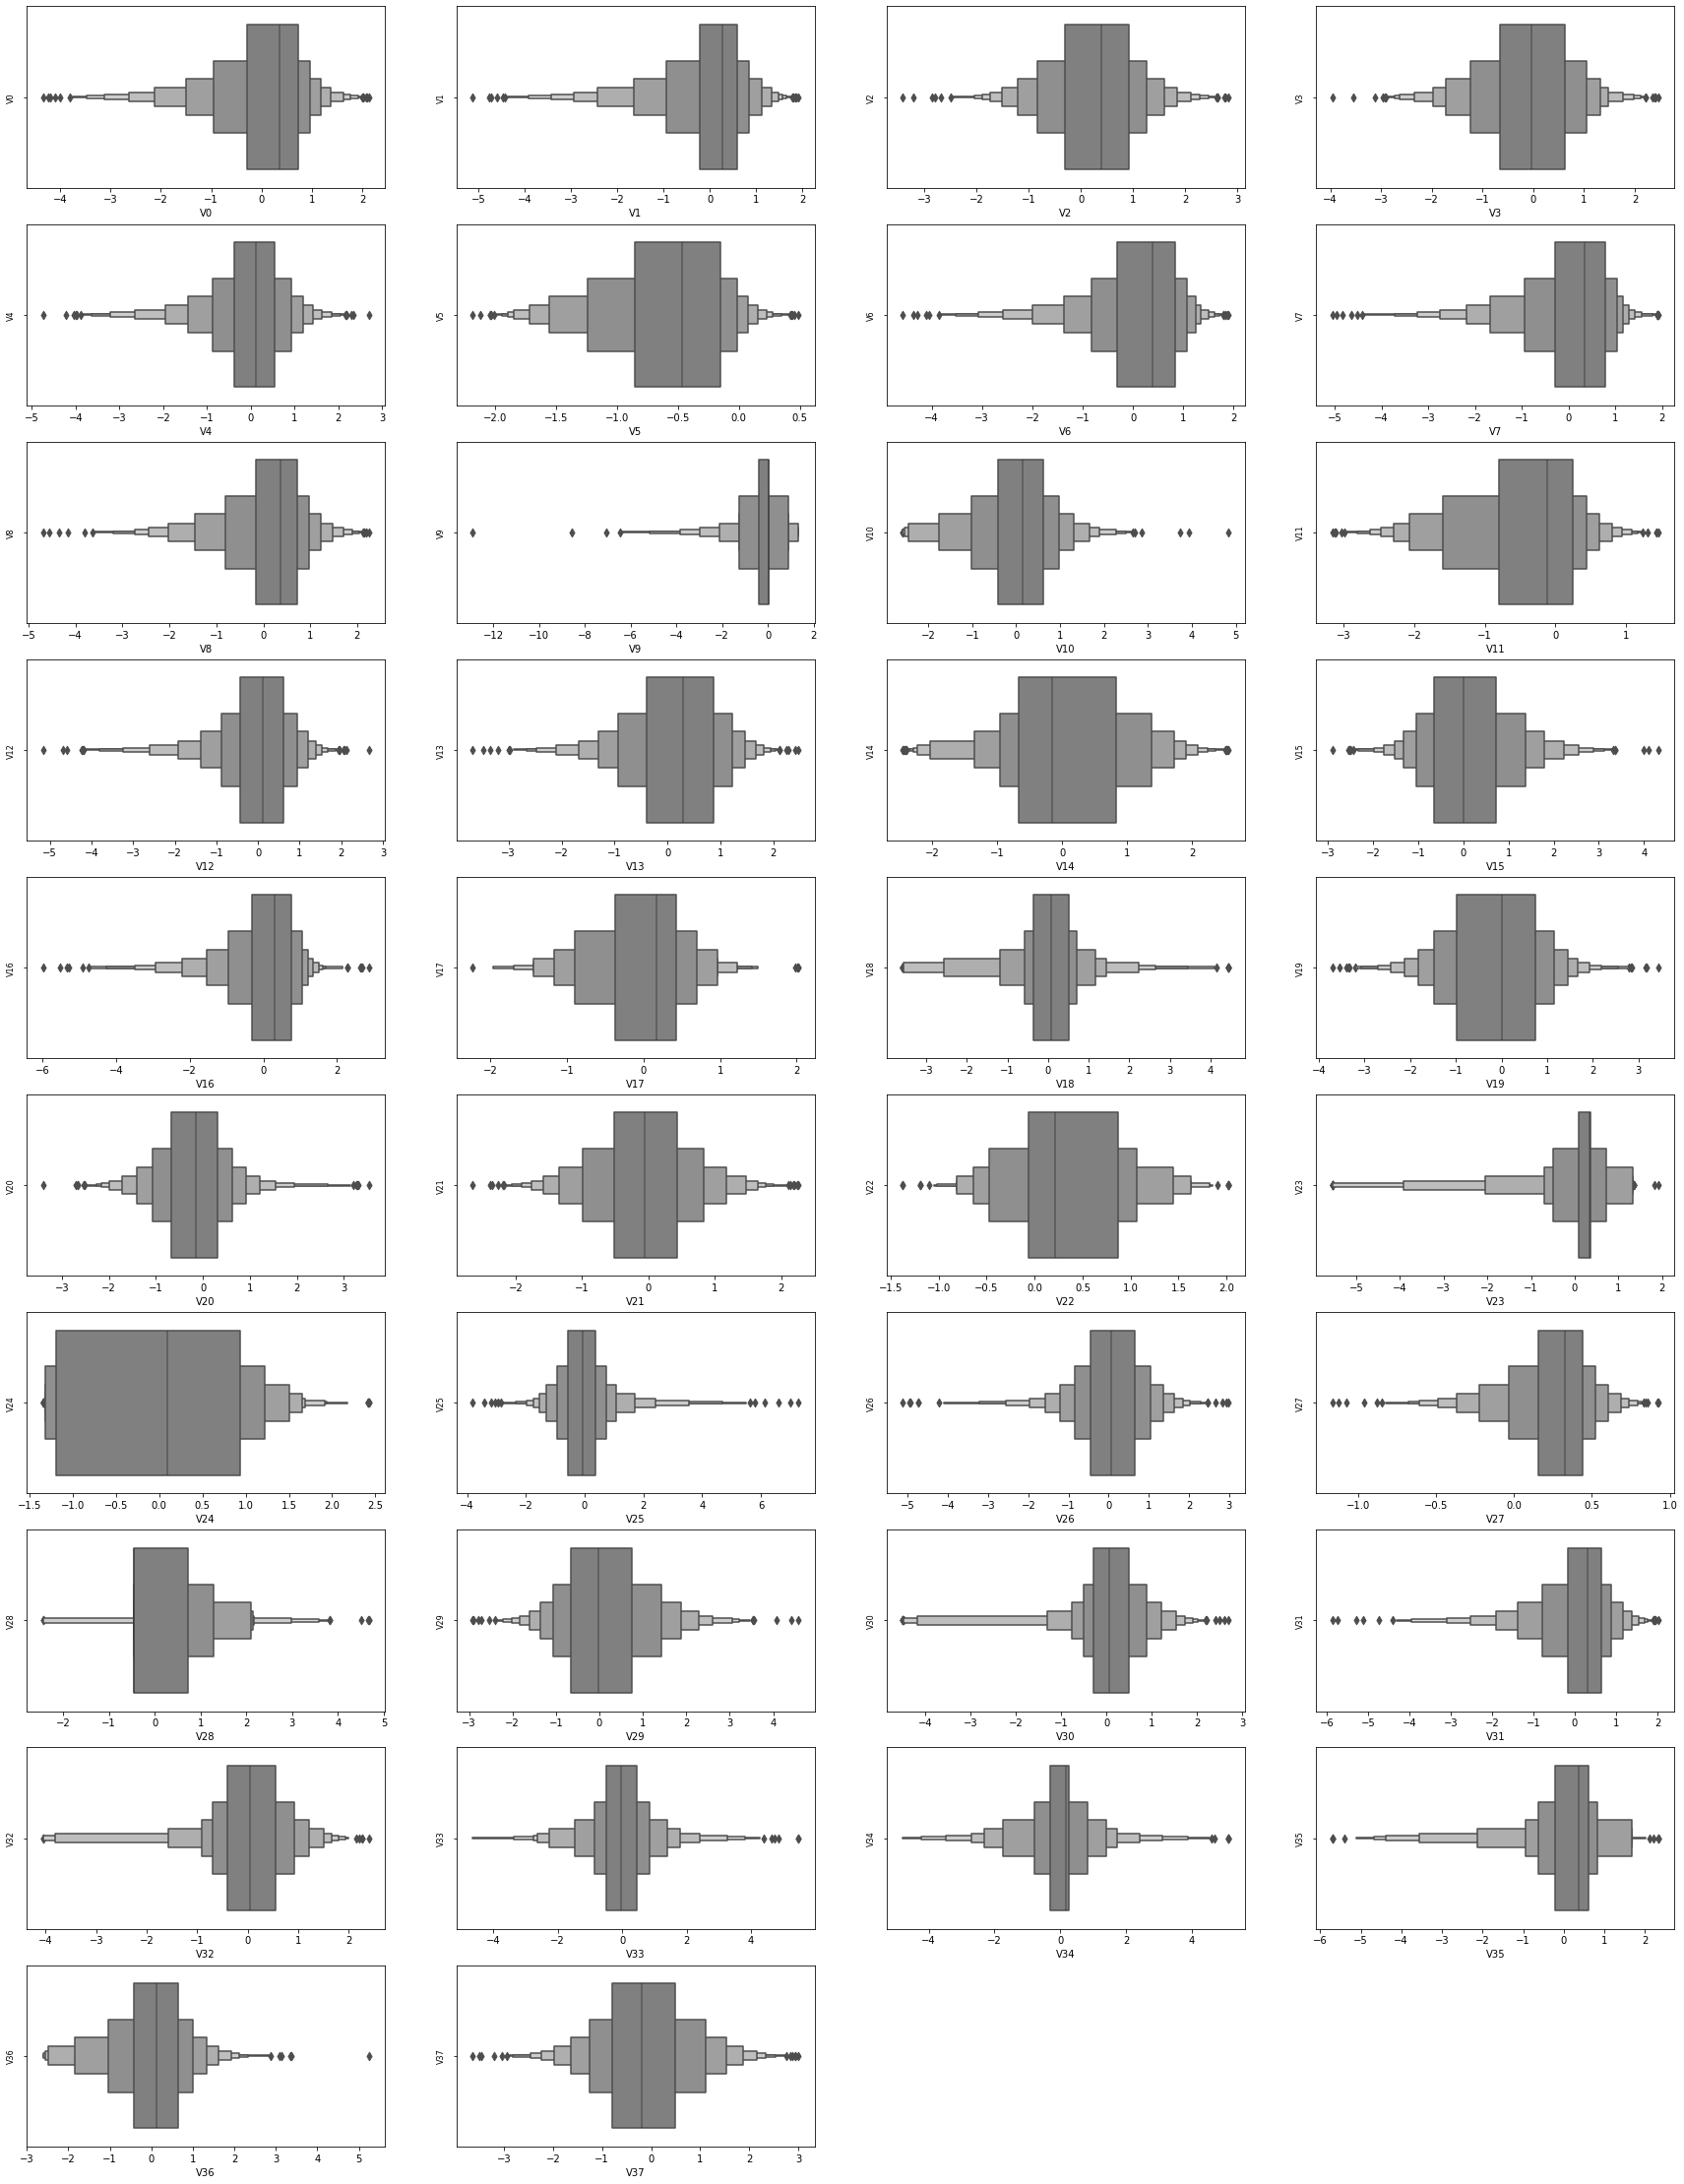

In [128]:
# Draw boxenplot to explore the feature variable
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(30, 40))
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.boxenplot(train_data[column[i]], color = "gray")
    plt.ylabel(column[i], fontsize=8)
plt.show()

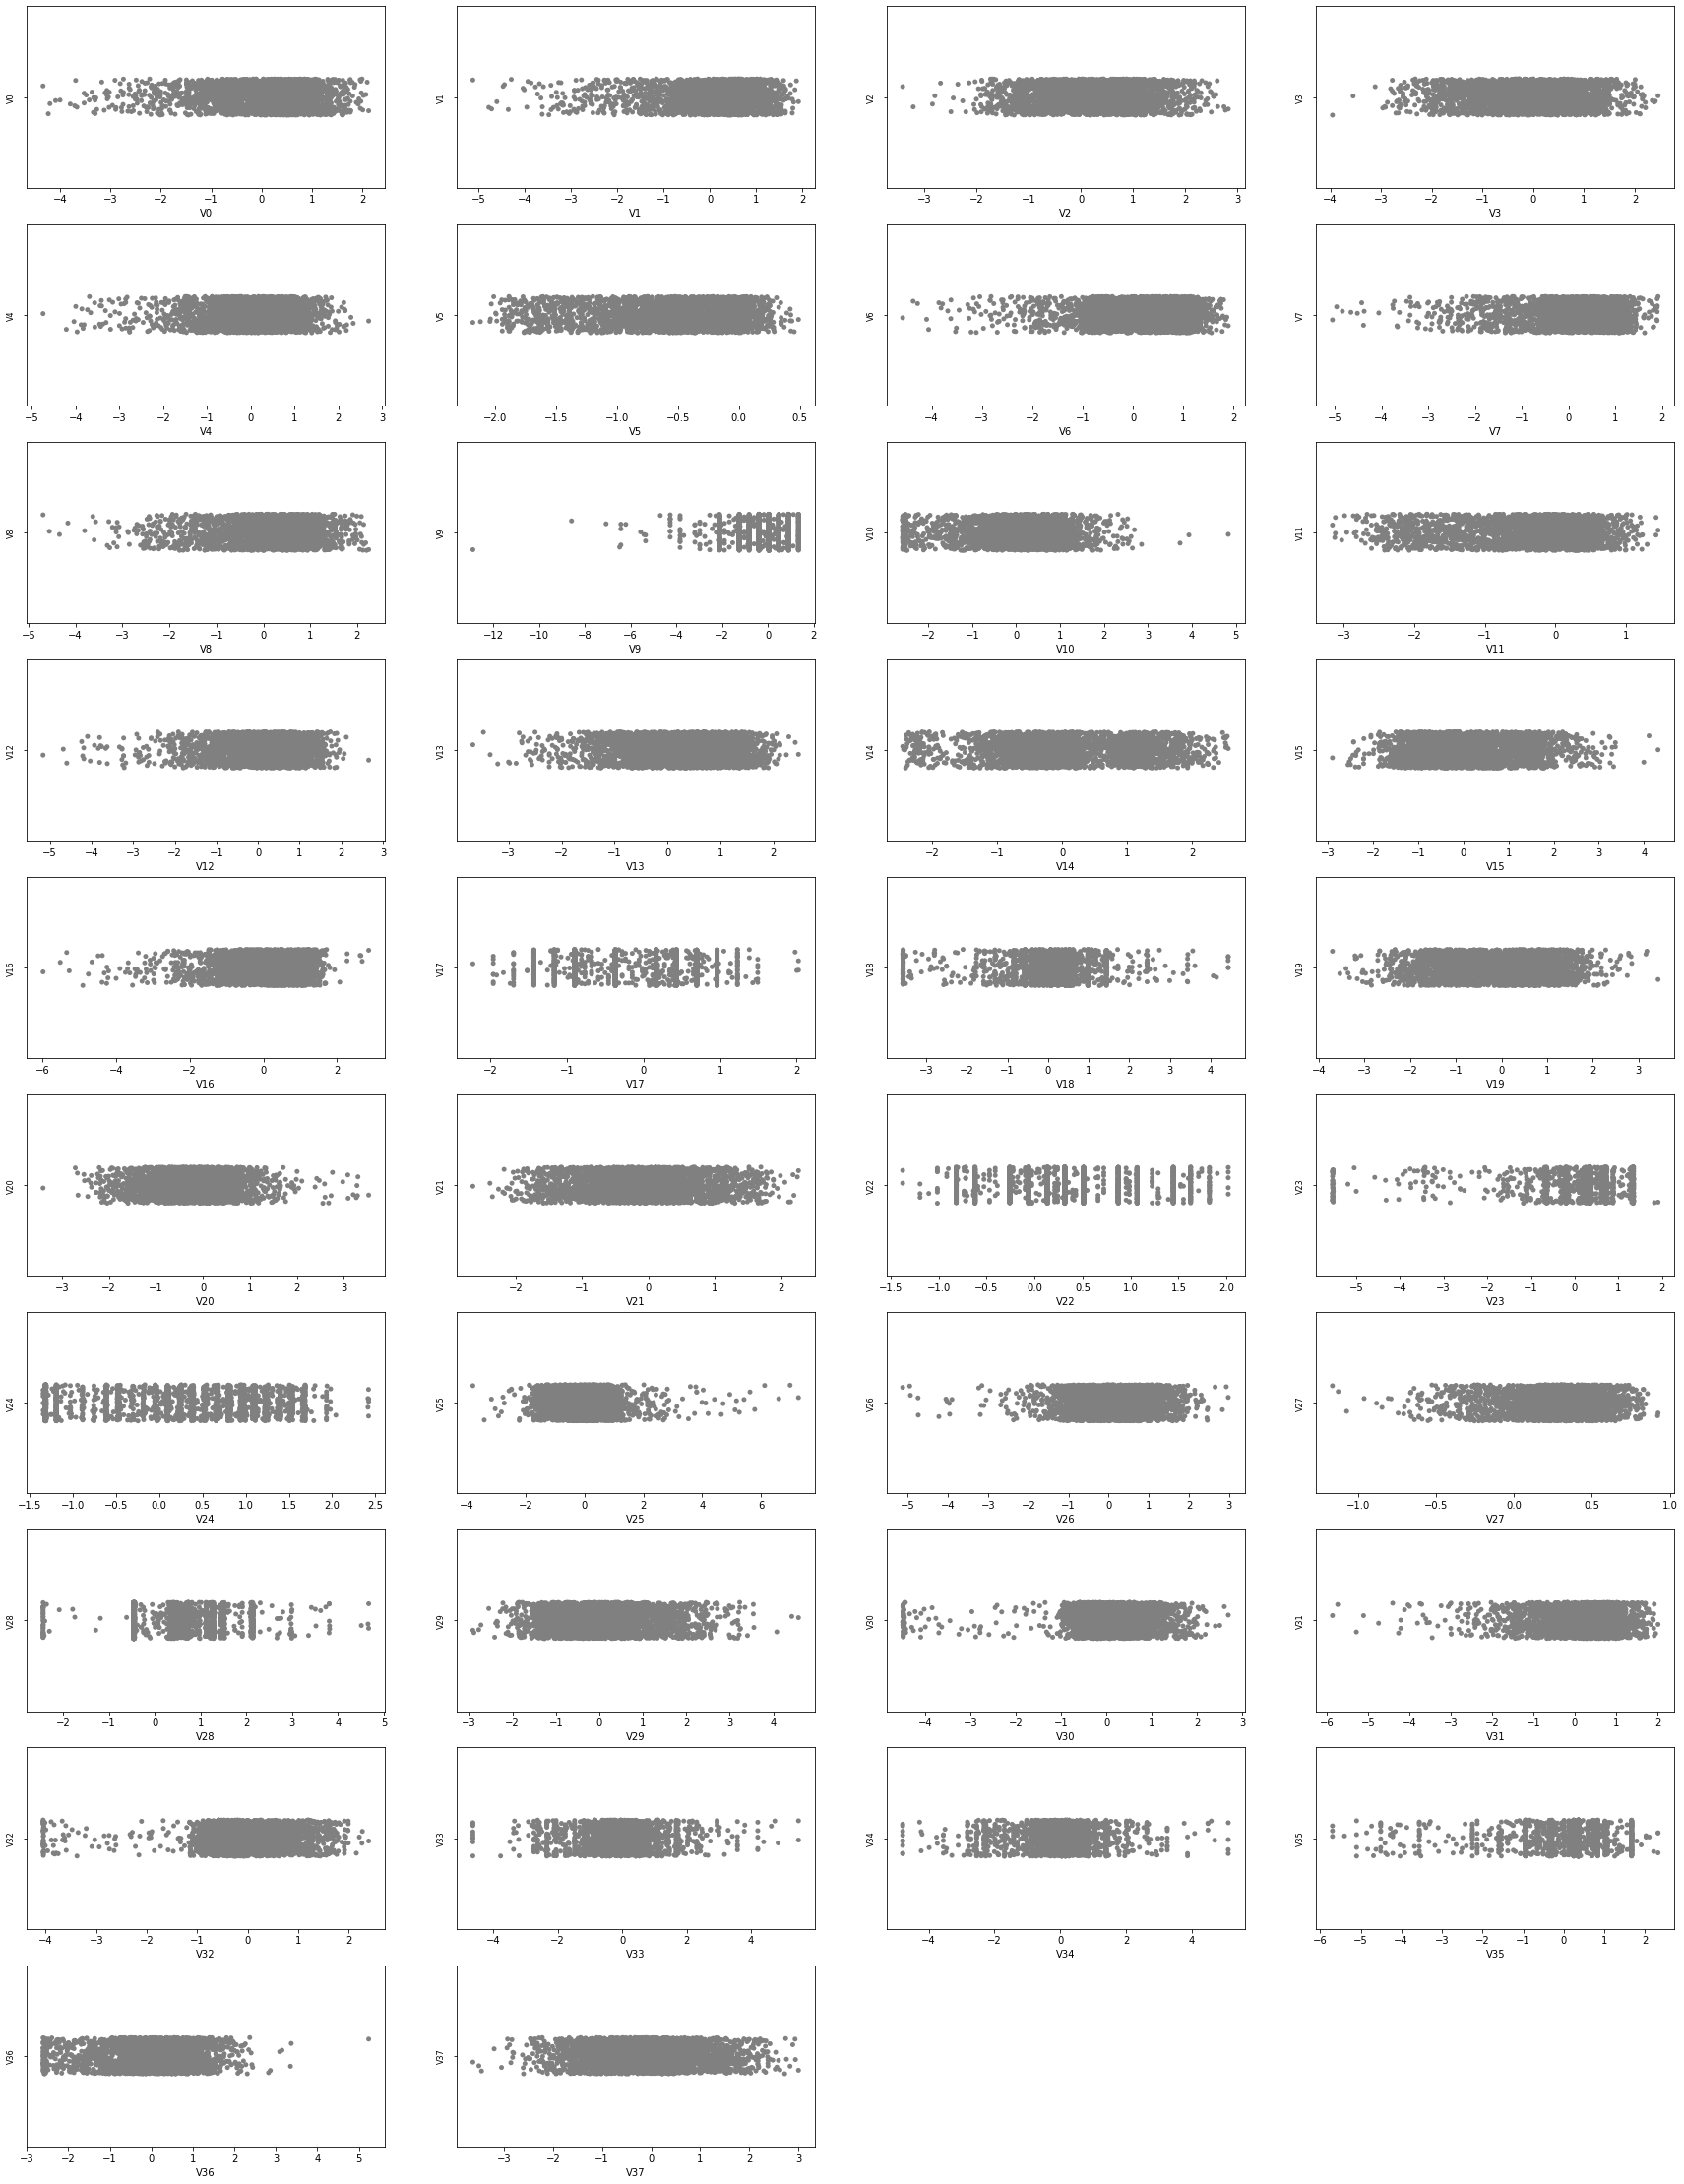

In [129]:
# Draw stripplot to explore the feature variable
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(30, 40))
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.stripplot(train_data[column[i]], color = "gray")
    plt.ylabel(column[i], fontsize=8)
plt.show()

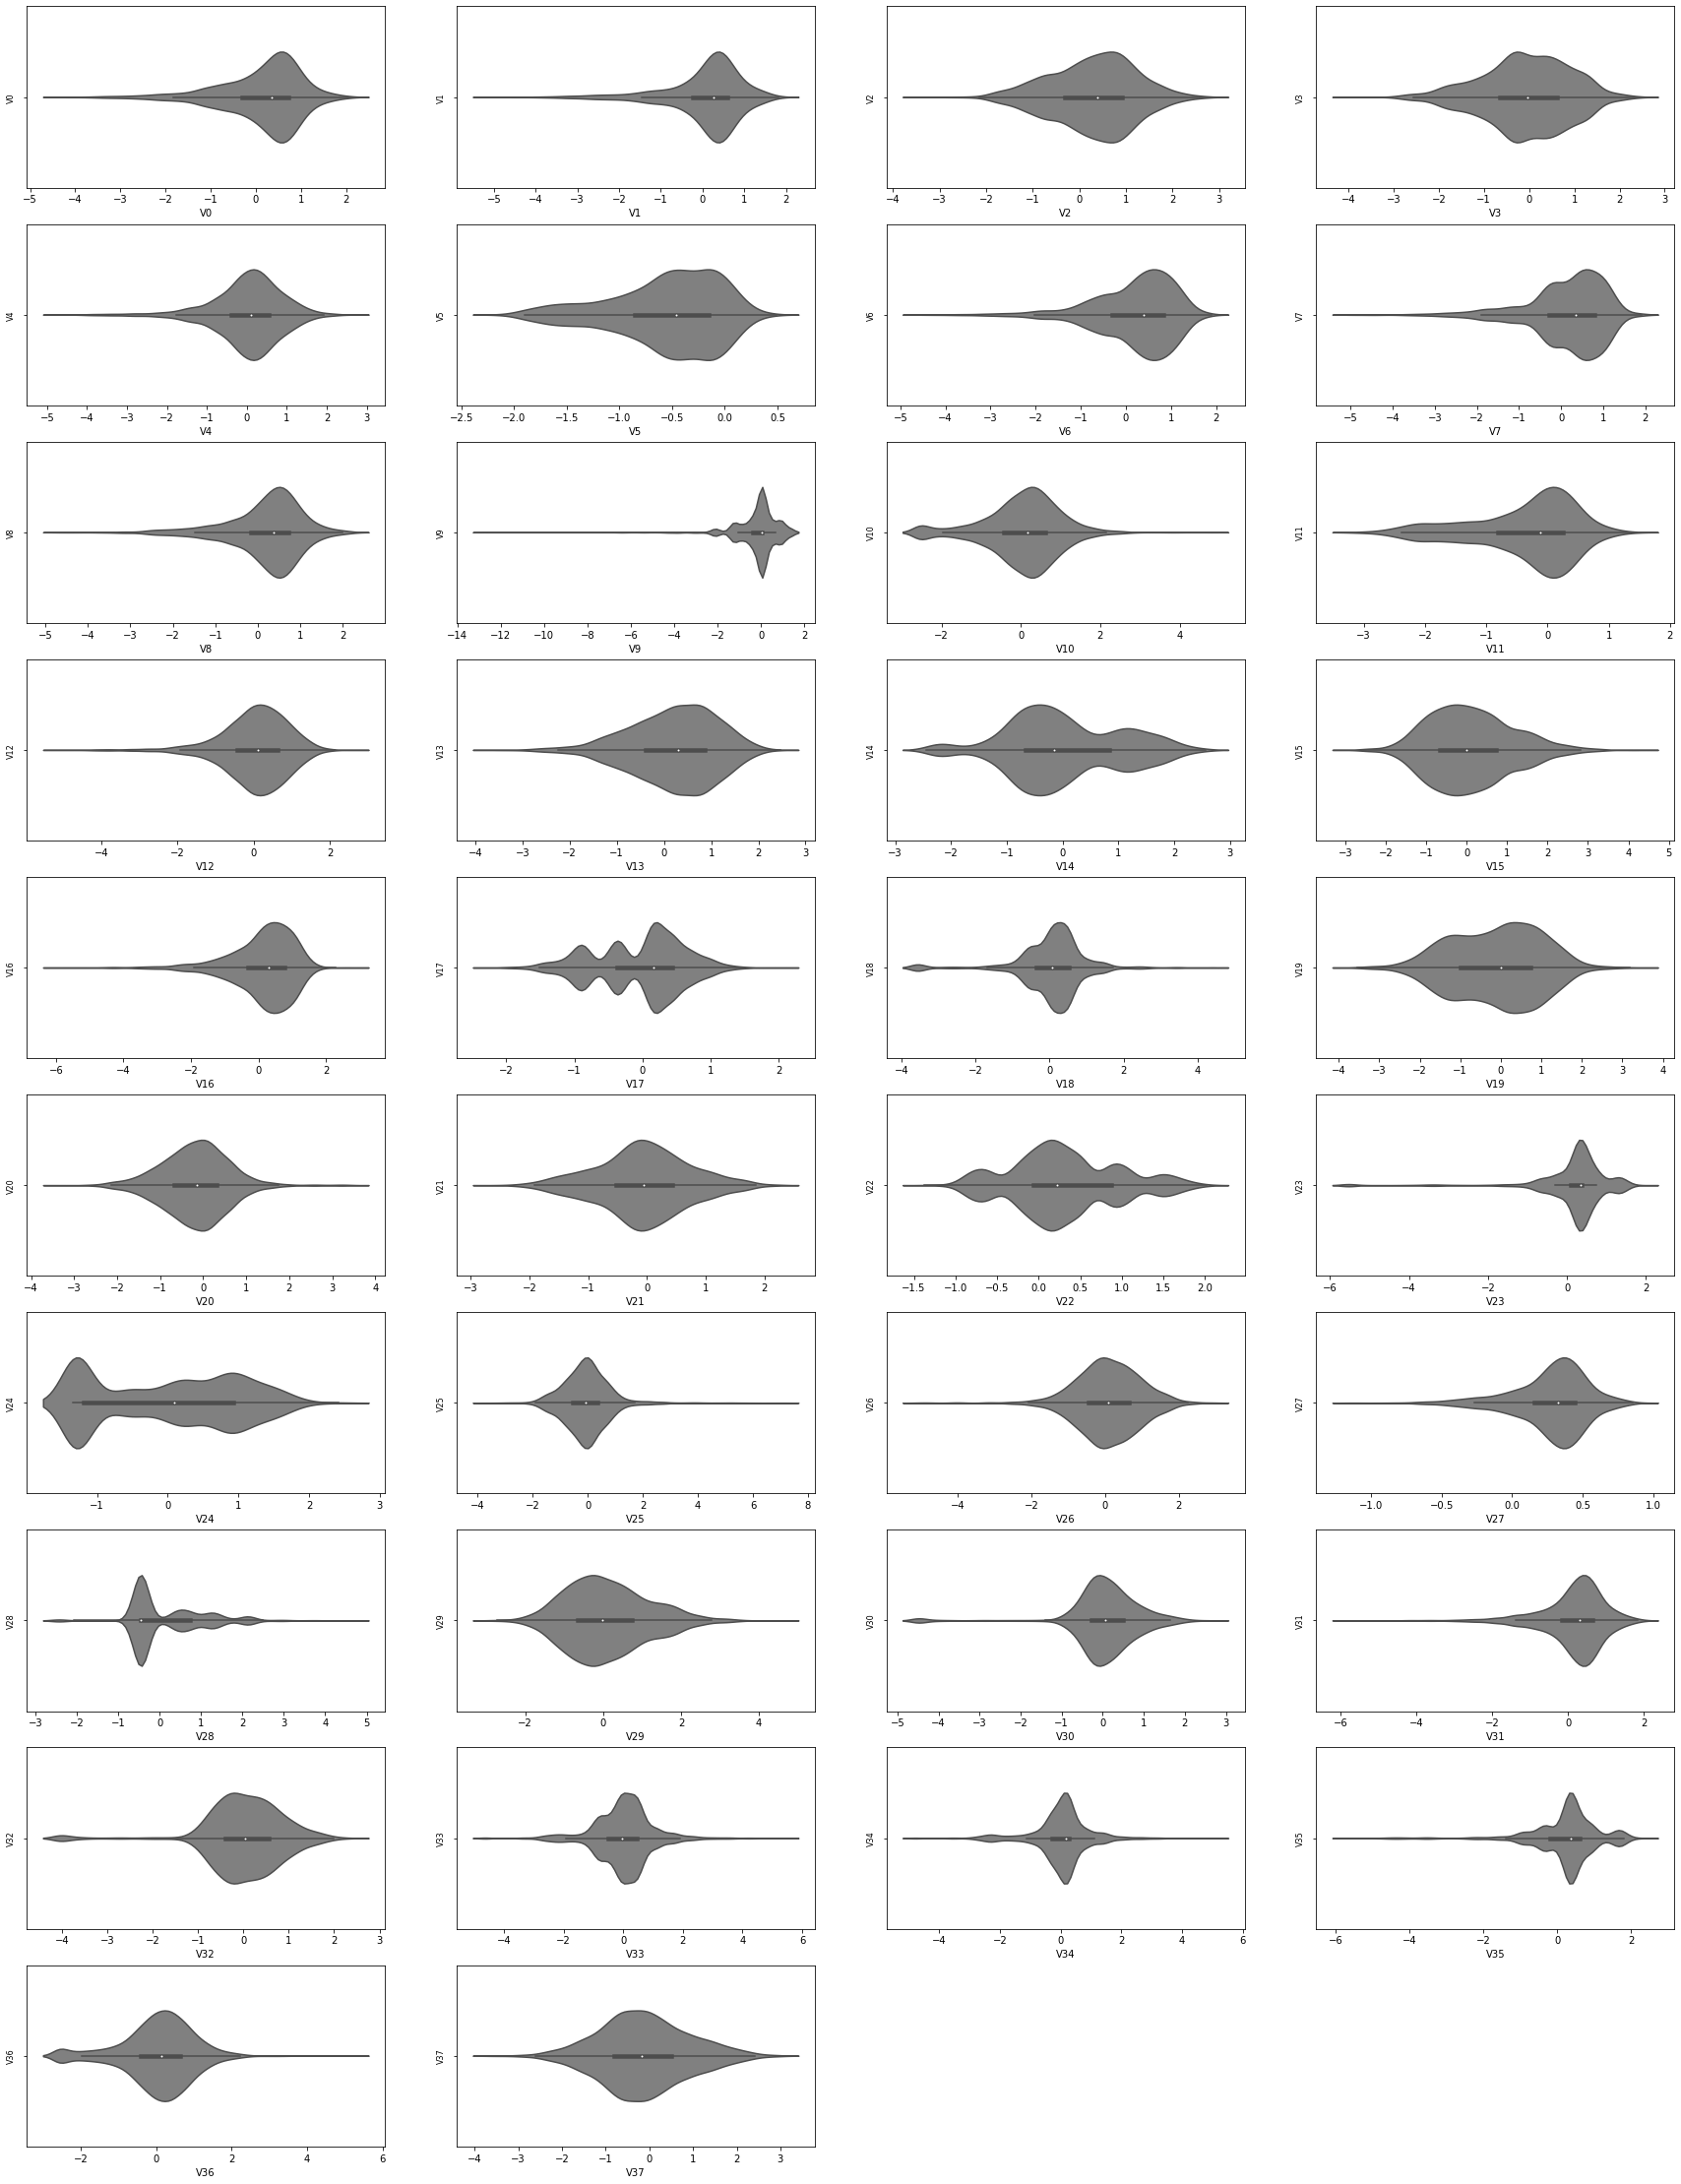

In [130]:
# Draw violinplot to explore the feature variable
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(30, 40))
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.violinplot(train_data[column[i]], color = "gray", width=0.5)
    plt.ylabel(column[i], fontsize=8)
plt.show()

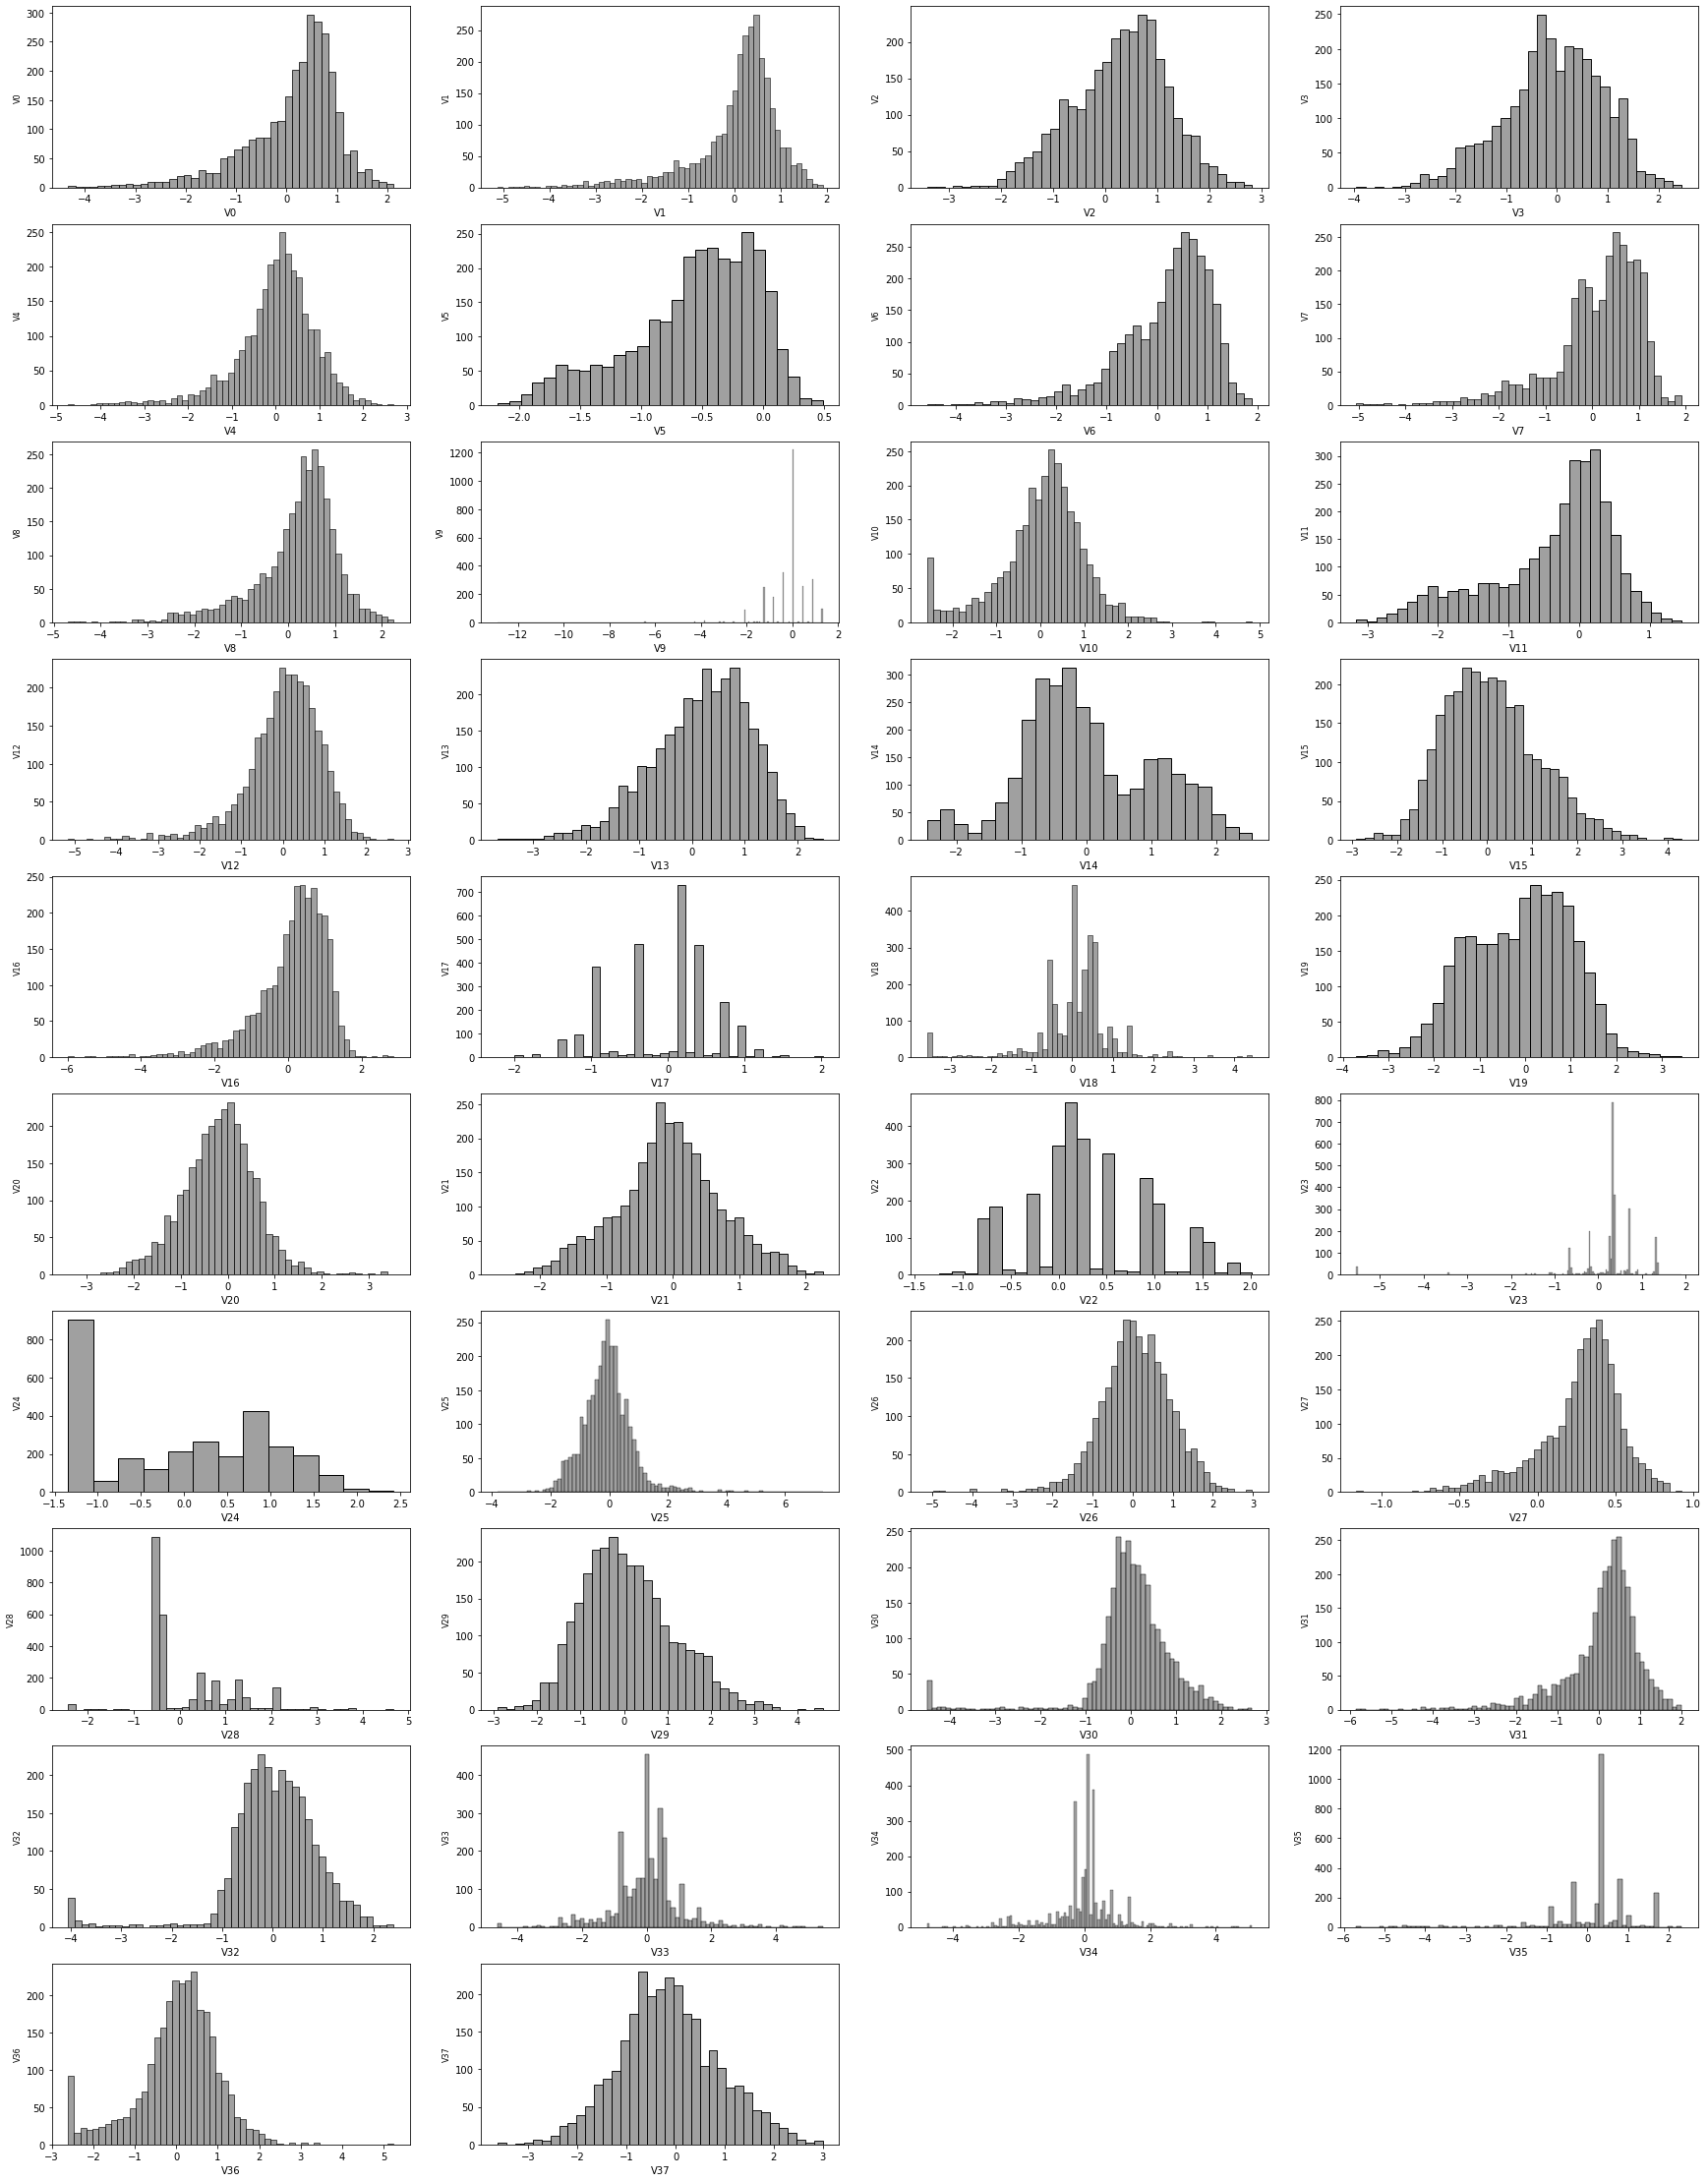

In [131]:
# Draw histplot to explore the feature variable
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(30, 40))
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.histplot(train_data[column[i]], color = "gray")
    plt.ylabel(column[i], fontsize=8)
plt.show()

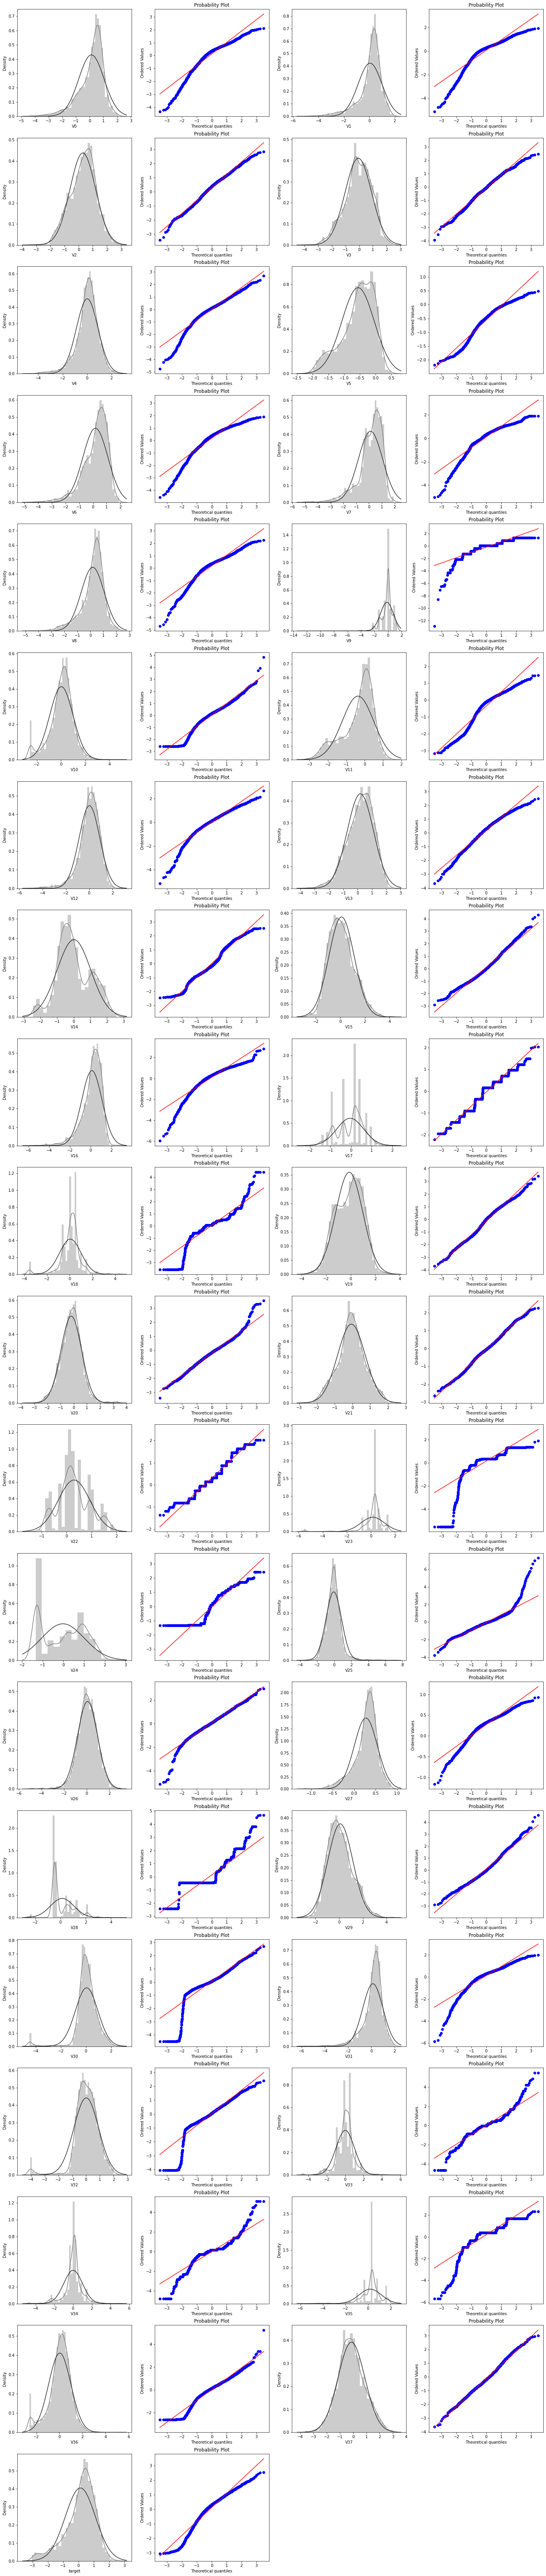

In [132]:
# Draw the distplot and probplot of all the feature variables to check if the data is close to normal distribution
train_cols = 4
train_rows = len(train_data.columns)
plt.figure(figsize = (6 * train_cols, 6 * train_rows))

i = 0
for col in train_data.columns:
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_data[col], color = "gray", fit = stats.norm)
    
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(train_data[col], plot = plt)
plt.show()

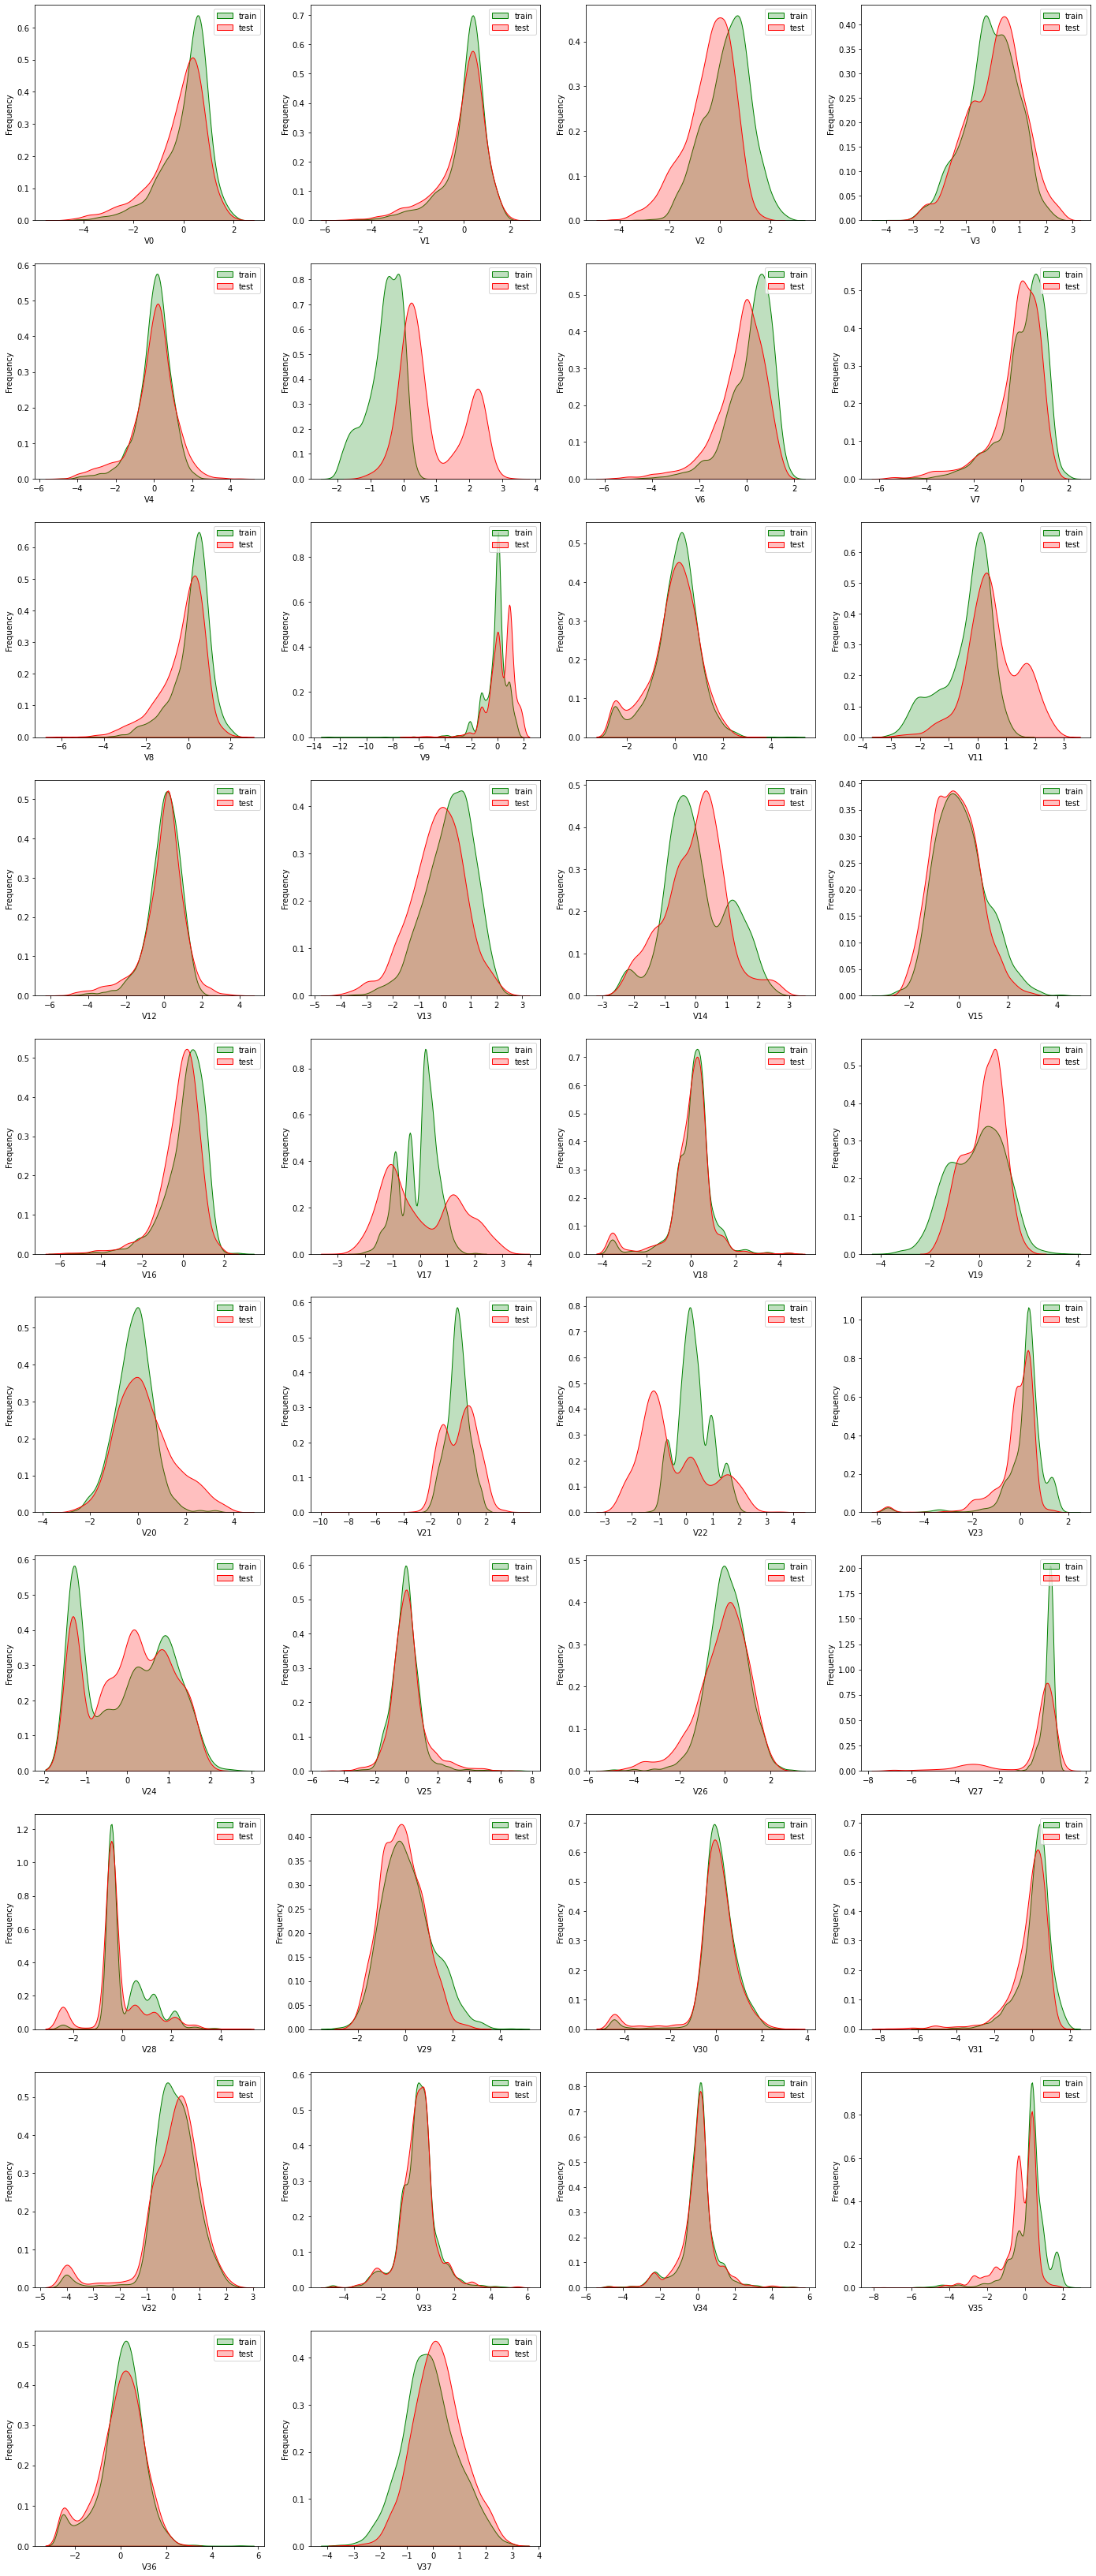

In [133]:
# compare the frequency distribution of all feature variables in the training set and test set
dist_cols = 4
dist_rows = len(test_data.columns)
plt.figure(figsize=(6 * dist_cols, 6 * dist_rows))

i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color = "green", shade = True)
    ax = sns.kdeplot(test_data[col], color = "red", shade = True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i += 1
plt.show()

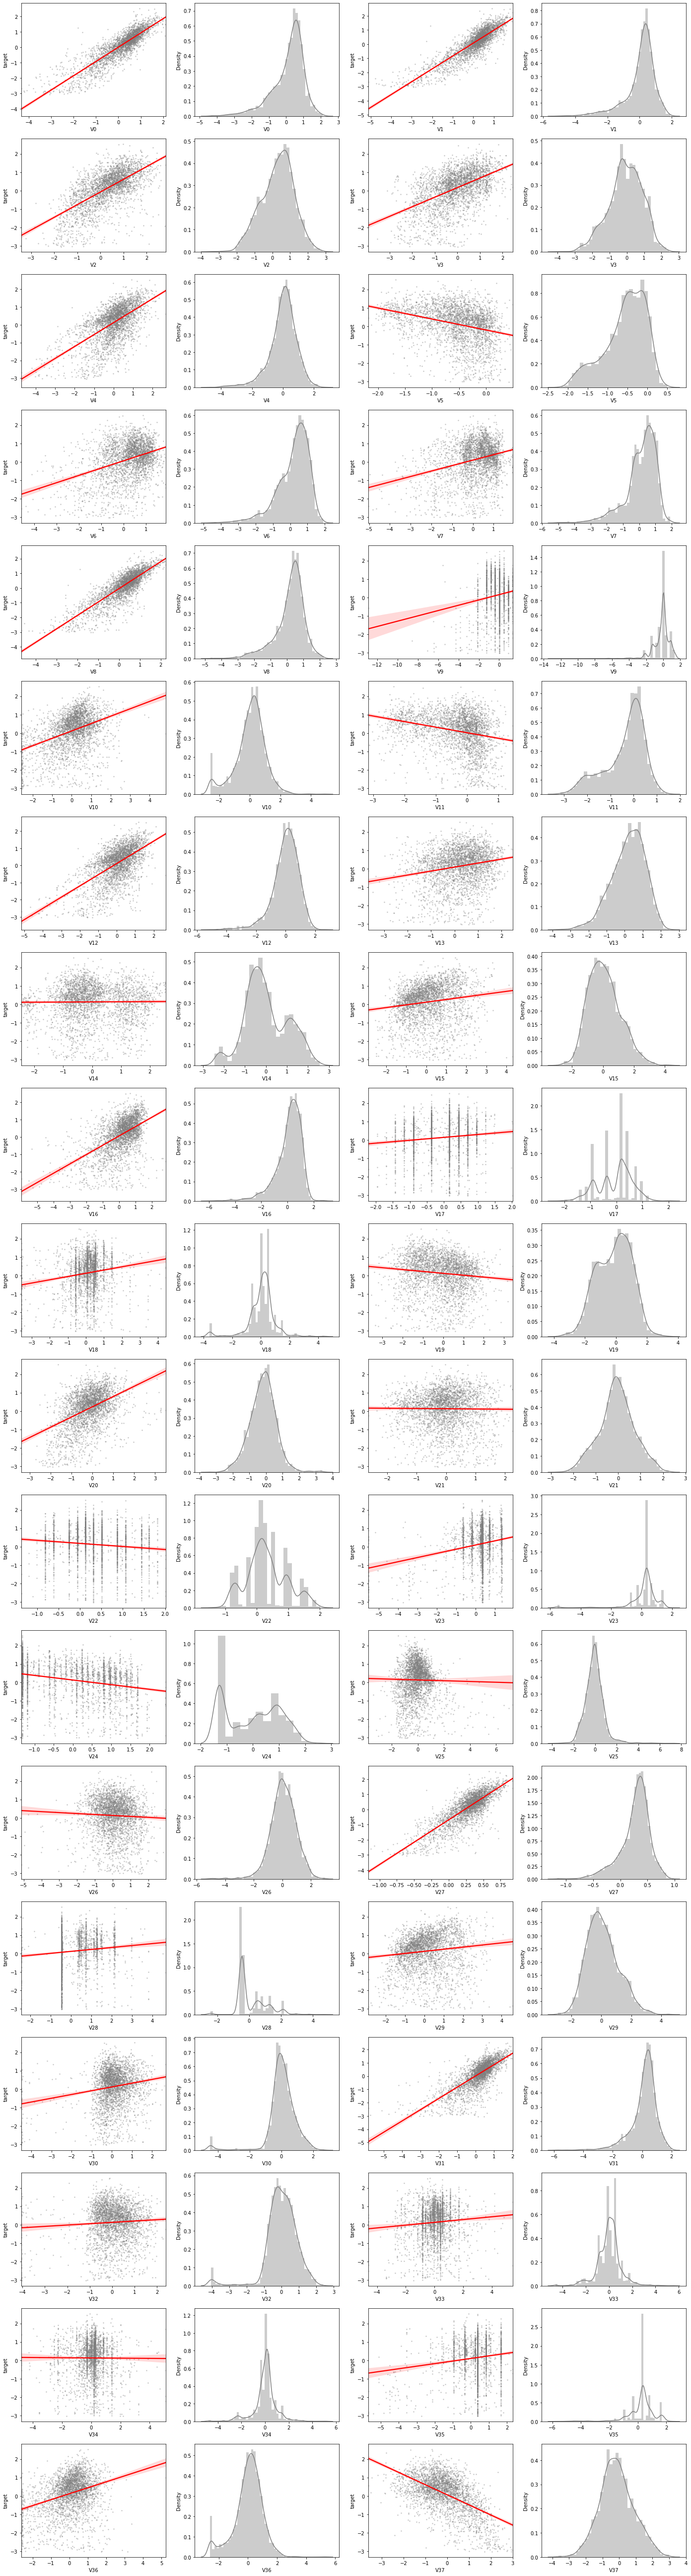

In [134]:
# plot target versus feature for all feature variables to get a sense of the regression relation
fcols = 4
frows = len(test_data.columns)
plt.figure(figsize = (6 * fcols, 5 * frows))

i = 0
for col in test_data.columns:
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x = col, y = 'target', data = train_data, ax = ax, color = "gray",
                scatter_kws = {'marker':'.', 's': 3, 'alpha': 0.3},
                line_kws = {'color': 'r'})
    plt.xlabel(col)
    plt.ylabel('target')
    
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna(), color = "gray")
    plt.xlabel(col)

In [135]:
# Compute pairwise correlation of columns
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'], axis = 1)
train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4        V6        V7  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  0.189267  0.141294   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  0.276805  0.205023   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  0.615938  0.477114   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  0.233896  0.197836   
V4      0.781212  0.657790  0.057697  0.315046  1.000000 -0.117529 -0.052370   
V6      0.189267  0.276805  0.615938  0.233896 -0.117529  1.000000  0.917502   
V7      0.141294  0.205023  0.477114  0.197836 -0.052370  0.917502  1.000000   
V8      0.794013  0.874650  0.703431  0.411946  0.449542  0.468233  0.389987   
V10     0.298443  0.310120  0.346006  0.321262  0.141129  0.415660  0.310982   
V12     0.751830  0.656186  0.059941  0.306397  0.927685 -0.087312 -0.036791   
V13     0.185144  0.157518  0.204762 -0.003636  0.075993  0.138367  0.110973   
V14    -0.004144 -0.006268 -0.106282 -0.232677  0.023853  0.072911  0.163931   
V15     0.314520  0.164702 -0.224573  0.143457  0.615704 -0.431542 -0.291272   
V16     0.347357  0.435606  0.782474  0.394517  0.023818  0.847119  0.752683   
V18     0.148622  0.123862  0.132105  0.022868  0.136022  0.110570  0.098691   
V19    -0.100294 -0.092673 -0.161802 -0.246008 -0.205729  0.215290  0.158371   
V20     0.462493  0.459795  0.298385  0.289594  0.291309  0.136091  0.089399   
V21    -0.029285 -0.012911 -0.030932  0.114373  0.174025 -0.051806 -0.065300   
V23     0.231136  0.222574  0.065509  0.081374  0.196530  0.069901  0.125180   
V24    -0.324959 -0.233556  0.010225 -0.237326 -0.529866  0.072418 -0.030292   
V25    -0.200706 -0.070627  0.481785 -0.100569 -0.444375  0.438610  0.316744   
V26    -0.125140 -0.043012  0.035370 -0.027685 -0.080487  0.106055  0.160566   
V27     0.733198  0.824198  0.726250  0.392006  0.412083  0.474441  0.424185   
V29     0.302145  0.147096 -0.275764  0.117610  0.659093 -0.467980 -0.311363   
V30     0.156968  0.175997  0.175943  0.043966  0.022807  0.188907  0.170113   
V31     0.675003  0.769745  0.653764  0.421954  0.447016  0.546535  0.475254   
V32     0.050951  0.085604  0.033942 -0.092423 -0.026186  0.144550  0.122707   
V33     0.056439  0.035129  0.050309 -0.007159  0.062367  0.054210  0.034508   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659 -0.002914 -0.019103   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  0.044992  0.111166   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  0.433804  0.340479   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054 -0.404817 -0.292285   
target  0.873212  0.871846  0.638878  0.512074  0.603984  0.370037  0.287815   

              V8       V10       V12  ...       V29       V30       V31  \
V0      0.794013  0.298443  0.751830  ...  0.302145  0.156968  0.675003   
V1      0.874650  0.310120  0.656186  ...  0.147096  0.175997  0.769745   
V2      0.703431  0.346006  0.059941  ... -0.275764  0.175943  0.653764   
V3      0.411946  0.321262  0.306397  ...  0.117610  0.043966  0.421954   
V4      0.449542  0.141129  0.927685  ...  0.659093  0.022807  0.447016   
V6      0.468233  0.415660 -0.087312  ... -0.467980  0.188907  0.546535   
V7      0.389987  0.310982 -0.036791  ... -0.311363  0.170113  0.475254   
V8      1.000000  0.419703  0.420557  ... -0.011091  0.150258  0.878072   
V10     0.419703  1.000000  0.140462  ... -0.105042 -0.036705  0.560213   
V12     0.420557  0.140462  1.000000  ...  0.666775  0.028866  0.441963   
V13     0.153299 -0.059553  0.098771  ...  0.008235  0.027328  0.113743   
V14     0.008138 -0.077543  0.020069  ...  0.056814 -0.004057  0.010989   
V15     0.018366 -0.046737  0.642081  ...  0.951314 -0.111311  0.011768   
V16     0.680031  0.546975  0.025736  ... -0.342210  0.154794  0.778538   
V18     0.093682 -0.024693  0.119833  ...  0.053958  0.470341  0.079718   
V19    -0.144693  0.074903 -0.148319  ... -0.205409  0.100133 -0.131542   
V20     0.412868  

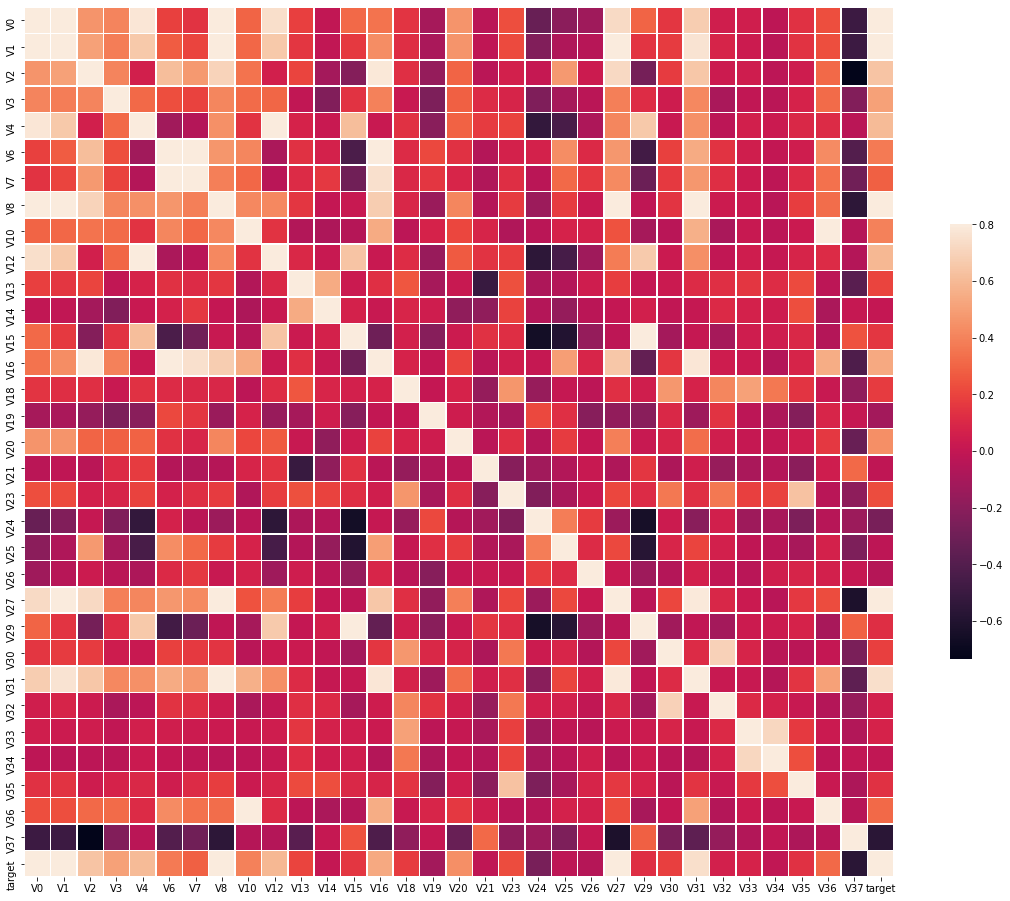

In [136]:
# Draw heatmap to show correlation relations
ax = plt.subplots(figsize=(20, 16))

ax = sns.heatmap(train_corr, vmax=.8, square=True, linewidths=.5, cbar_kws={"shrink": .5})

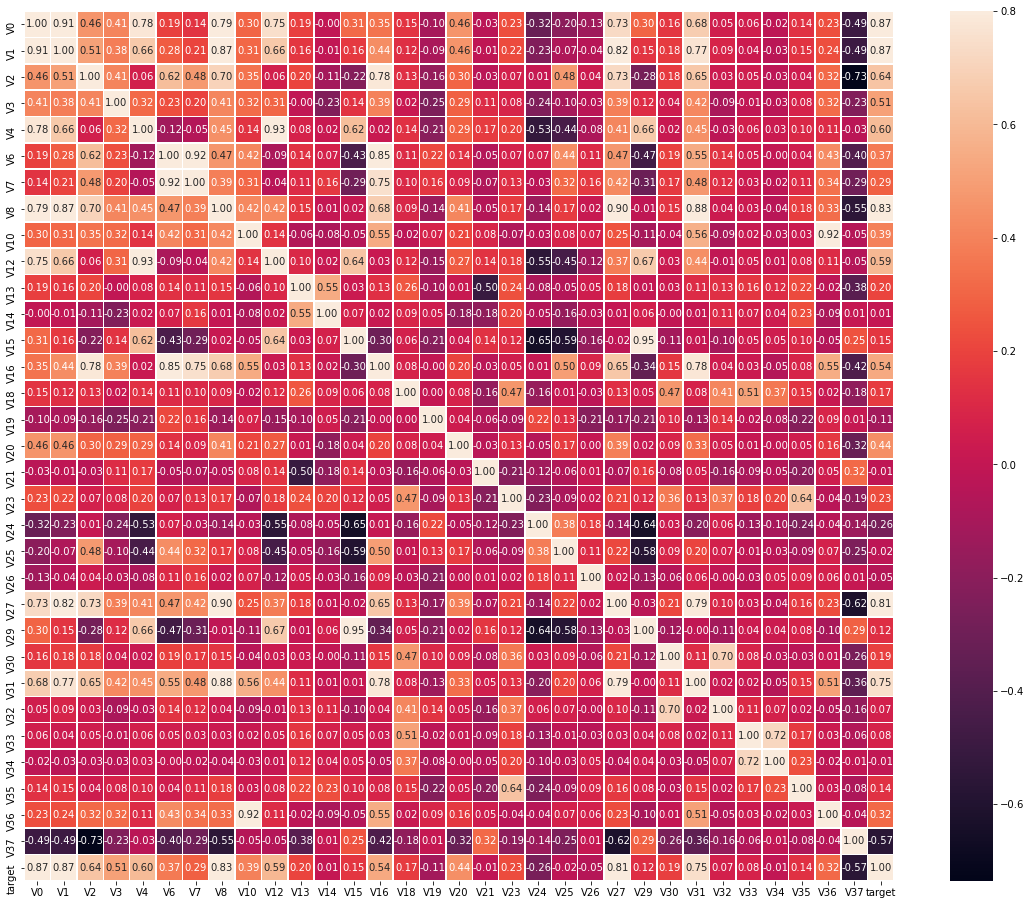

In [137]:
# Show numbers on the plot
ax = plt.subplots(figsize = (20, 16))

ax = sns.heatmap(train_corr, vmax = .8, square = True, linewidths = .5, annot = True, fmt = '0.2f')

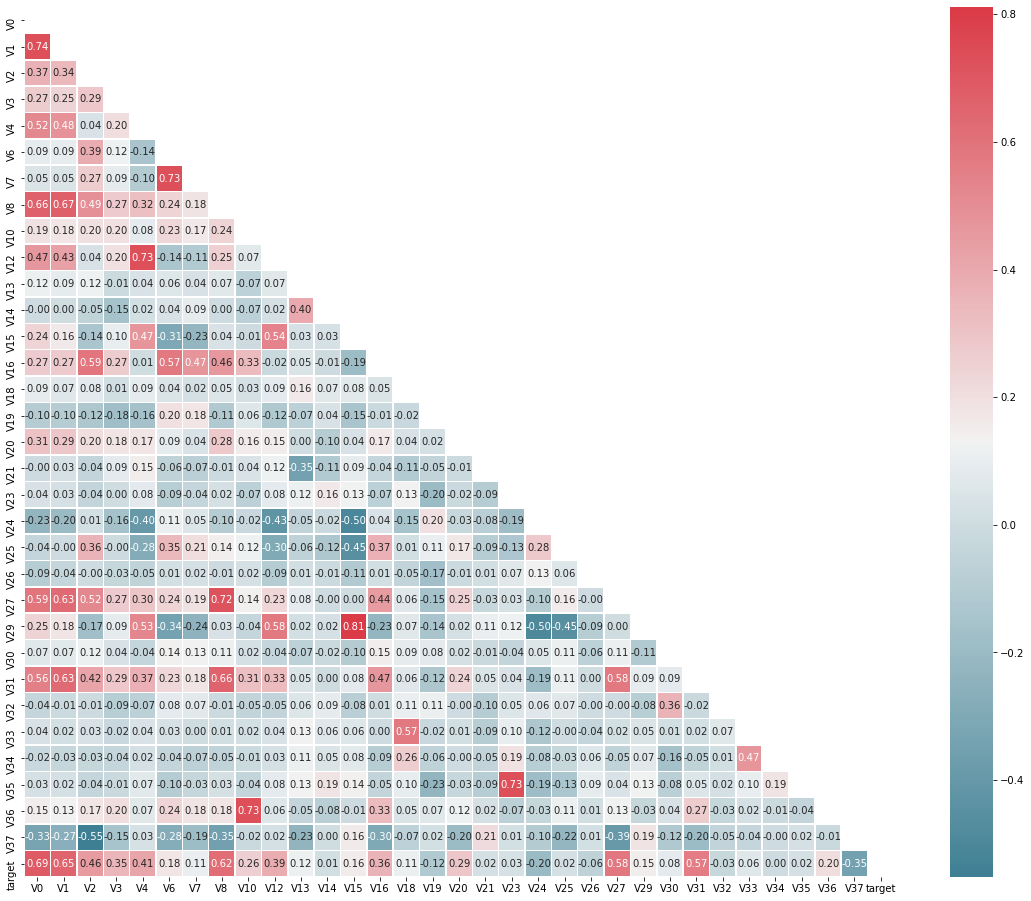

In [138]:
# Draw Kendall Tau correlation heatmap
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'], axis = 1)

plt.figure(figsize = (20, 16))
colnm = data_train1.columns.tolist()
mcorr = data_train1[colnm].corr(method = "kendall")
mask = np.zeros_like(mcorr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)
g = sns.heatmap(mcorr, mask = mask, cmap = cmap, square = True, linewidths = .5, annot = True, fmt = '0.2f')
plt.show()

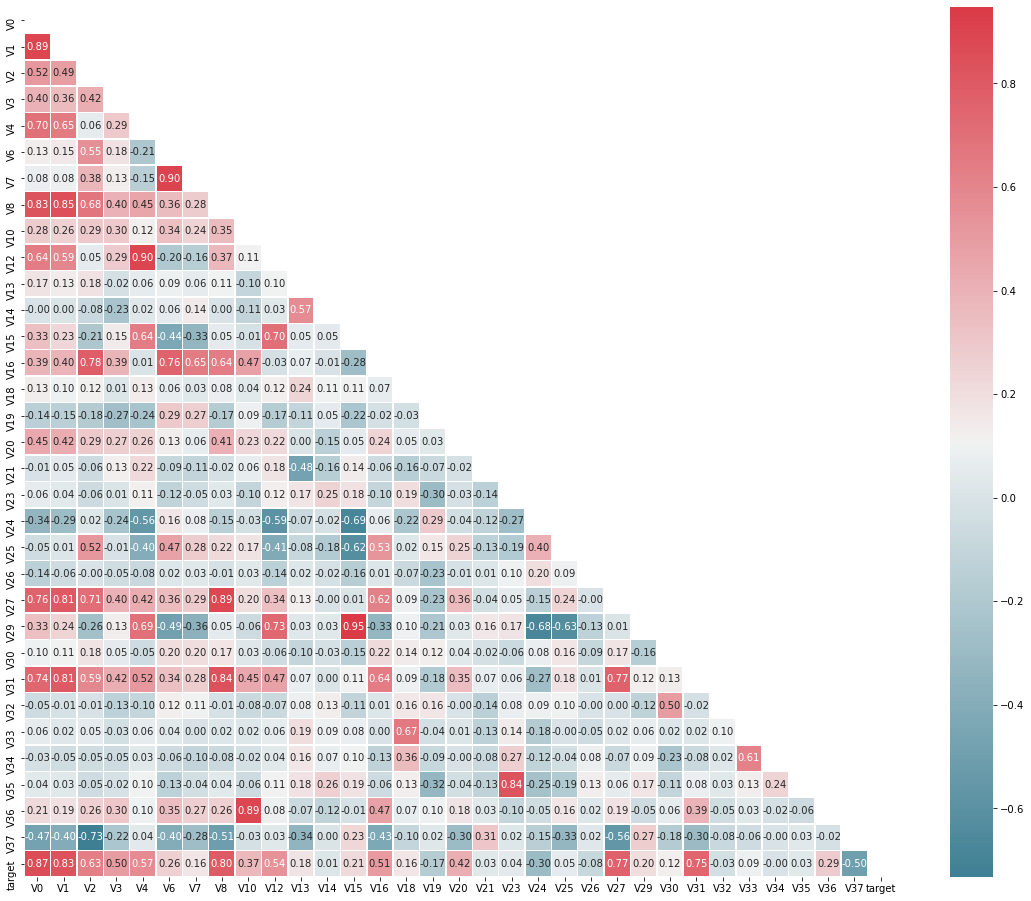

In [139]:
# Draw Spearman rank correlation heatmap
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'], axis = 1)

plt.figure(figsize = (20, 16))
colnm = data_train1.columns.tolist()
mcorr = data_train1[colnm].corr(method = "spearman")
mask = np.zeros_like(mcorr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)
g = sns.heatmap(mcorr, mask = mask, cmap = cmap, square = True, linewidths = .5, annot = True, fmt = '0.2f')
plt.show()

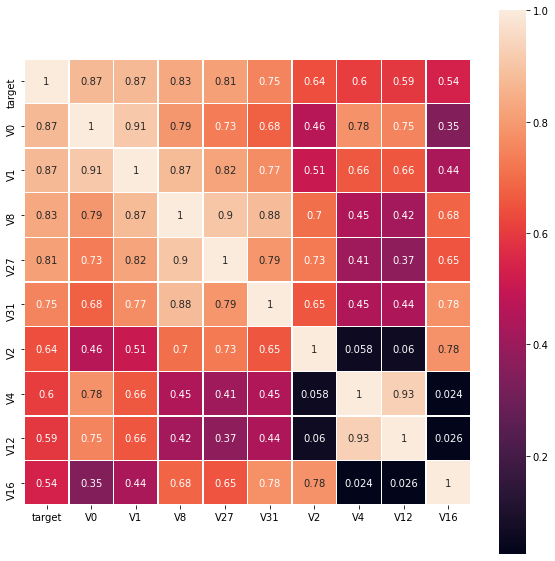

In [140]:
# get the k most correlated feature variables
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize = (10, 10))
hm = sns.heatmap(train_data[cols].corr(), square = True, linewidths = .5, annot = True)

plt.show()

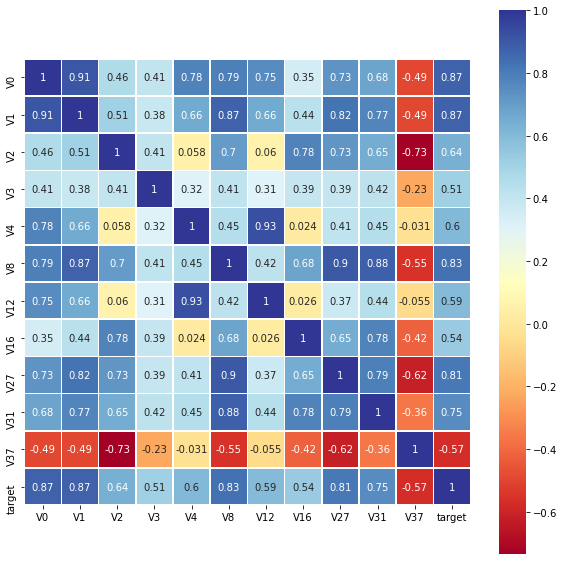

In [141]:
# get the features which have abs(correlation coefficient) > threshold with respect to the target variable
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize = (10, 10))
g = sns.heatmap(train_data[top_corr_features].corr(), square = True, linewidths = .5, annot = True, cmap="RdYlBu")

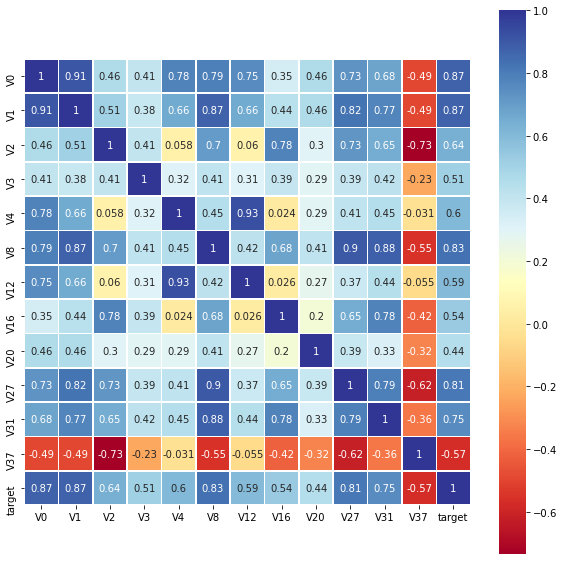

In [142]:
# get the features which have abs(correlation coefficient) > threshold with respect to the target variable
threshold = 0.4

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize = (10, 10))
g = sns.heatmap(train_data[top_corr_features].corr(), square = True, linewidths = .5, annot = True, cmap="RdYlBu")

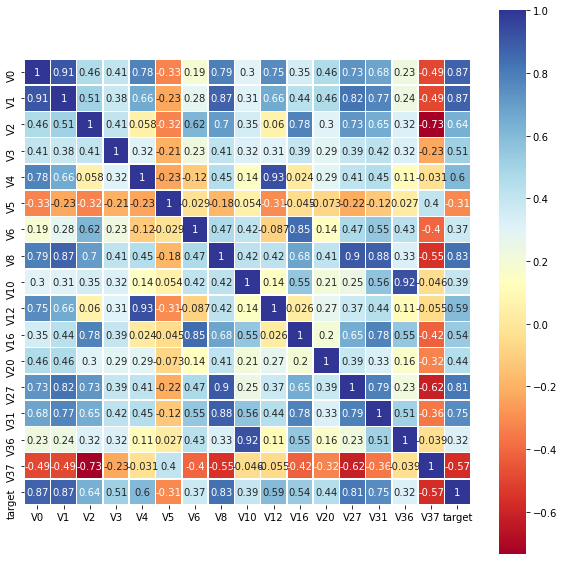

In [143]:
# get the features which have abs(correlation coefficient) > threshold with respect to the target variable
threshold = 0.3

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize = (10, 10))
g = sns.heatmap(train_data[top_corr_features].corr(), square = True, linewidths = .5, annot = True, cmap="RdYlBu")